In [1]:
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load dataset
messages = pd.read_csv('spam.csv', encoding='latin-1')
messages.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
messages = messages.rename(columns={'v1': 'class', 'v2': 'text'})

In [3]:
# Add message length feature
messages['length'] = messages['text'].apply(len)

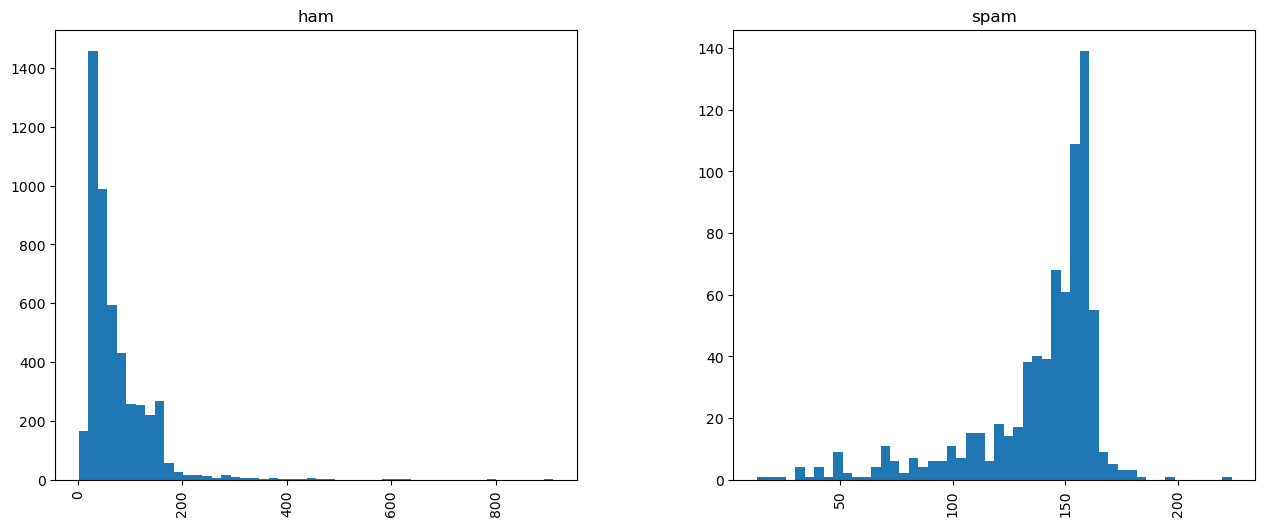

In [4]:
# Plot message length distribution
messages.hist(column='length', by='class', bins=50, figsize=(15, 6))
plt.show()

In [5]:
# Function to clean text
def process_text(text):
    """
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    """
    # Remove punctuation
    nopunc = ''.join([char for char in text if char not in string.punctuation])

    # Remove stopwords
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    return clean_words

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [8]:

# Apply text processing
messages['text'] = messages['text'].apply(process_text)

In [9]:
# Train-test split
msg_train, msg_test, class_train, class_test = train_test_split(
    messages['text'], messages['class'], test_size=0.2, random_state=42
)

In [10]:
# Build pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=lambda x: x)),  # Convert words to word count vectors
    ('tfidf', TfidfTransformer()),  # Convert counts to TF-IDF
    ('classifier', MultinomialNB())  # Train with Naive Bayes
])

In [11]:

# Train the model
pipeline.fit(msg_train, class_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function <lambda> at 0x0000012D8A096D30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [12]:

# Predict on test data
predictions = pipeline.predict(msg_test)

In [13]:

# Print performance metrics
print(classification_report(class_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



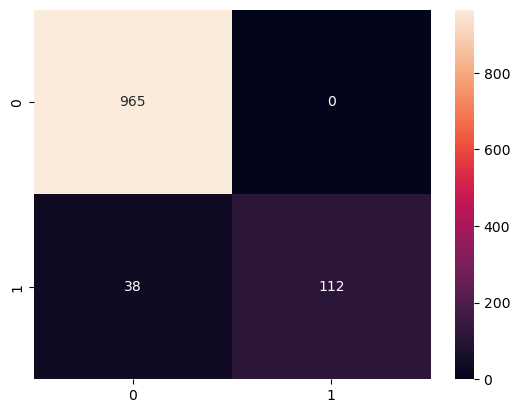

In [14]:

# Plot confusion matrix
sns.heatmap(confusion_matrix(class_test, predictions), annot=True, fmt='d')
plt.show()